<a href="https://colab.research.google.com/github/nikitosik258/collab/blob/main/sii_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(tidyr)
library(RColorBrewer)

In [4]:
# скачиваем датасет с локального хранилища (положить себе на гугл-диск и расшарить) 
# https://drive.google.com/drive/u/0/folders/1ngvxitbeCf5912JV7xH9n6MwKozT8A4X
system("gdown --id 1Q_okoKkyBZZe8oWMKPDXK26la_lbCTP2")
system("ls", TRUE)

dataset = read.csv("ufc_master_data.csv")

[1] "custumer_dataset_1.csv" "sample_data"            "ufc_master_data.csv"

In [5]:
# смотрим на данные
str(dataset)
head(dataset)
any(is.na(dataset))
summary(dataset)

'data.frame':	617 obs. of  14 variables:
 $ ranking        : chr  "C" "1" "2" "3" ...
 $ name           : chr  "Brandon Moreno" "Deiveson Figueiredo" "Askar Askarov" "Alexandre Pantoja" ...
 $ age            : int  27 33 29 31 29 29 28 29 28 31 ...
 $ weight         : int  125 125 125 125 125 125 125 125 125 125 ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ height         : int  67 65 65 65 64 67 65 65 66 68 ...
 $ ufc_wins       : int  8 9 3 8 6 2 5 3 5 5 ...
 $ ufc_loses      : int  2 2 0 3 2 2 2 2 1 4 ...
 $ ufc_draws      : int  2 1 1 NA NA NA NA NA NA NA ...
 $ ufc_no_contests: int  NA NA NA NA NA NA NA NA NA NA ...
 $ mma_wins       : int  19 20 14 24 24 12 22 17 17 15 ...
 $ mma_loses      : int  5 2 0 5 6 6 9 3 2 6 ...
 $ mma_draws      : int  2 1 1 NA NA NA NA NA 1 NA ...
 $ mma_no_contests: int  NA NA NA NA NA NA 1 1 NA NA ...


,ranking,name,age,weight,gender,height,ufc_wins,ufc_loses,ufc_draws,ufc_no_contests,mma_wins,mma_loses,mma_draws,mma_no_contests
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,C,Brandon Moreno,27,125,Male,67,8,2,2,NA,19,5,2,NA
2,1,Deiveson Figueiredo,33,125,Male,65,9,2,1,NA,20,2,1,NA
3,2,Askar Askarov,29,125,Male,65,3,0,1,NA,14,0,1,NA
4,3,Alexandre Pantoja,31,125,Male,65,8,3,NA,NA,24,5,NA,NA
5,4,Alex Perez,29,125,Male,64,6,2,NA,NA,24,6,NA,NA
6,5,Brandon Royval,29,125,Male,67,2,2,NA,NA,12,6,NA,NA


[1] TRUE

   ranking              name                age            weight     
 Length:617         Length:617         Min.   :21.00   Min.   :115.0  
 Class :character   Class :character   1st Qu.:28.00   1st Qu.:135.0  
 Mode  :character   Mode  :character   Median :31.00   Median :145.0  
                                       Mean   :31.13   Mean   :159.7  
                                       3rd Qu.:34.00   3rd Qu.:170.0  
                                       Max.   :44.00   Max.   :265.0  
                                                                      
    gender              height         ufc_wins        ufc_loses     
 Length:617         Min.   :59.00   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.:67.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median :69.00   Median : 3.000   Median : 2.000  
                    Mean   :69.53   Mean   : 4.686   Mean   : 2.901  
                    3rd Qu.:72.00   3rd Qu.: 6.000   3rd Qu.: 4.000  
            

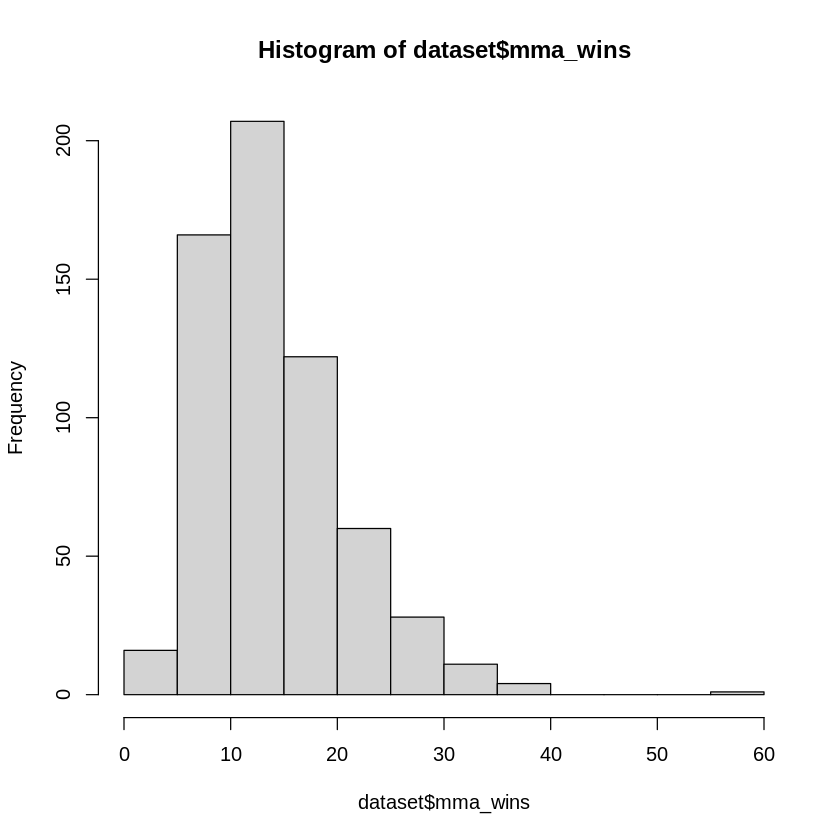

In [7]:
hist(dataset$mma_wins)

In [10]:
# предобработка: уберем пропуски в данных; удалим нецелевые признаки; 
df0 = data.frame(dataset)
df0 <- na.omit(df0)

df = subset(df0, select = -c(name, gender, ranking))

any(is.na(df))
nrow(df)

[1] FALSE

[1] 6

In [11]:
# нормализуем данные
df_scaled <- data.frame(scale(df))

head(df_scaled)
nrow(df_scaled)

,age,weight,height,ufc_wins,ufc_loses,ufc_draws,ufc_no_contests,mma_wins,mma_loses,mma_draws,mma_no_contests
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93,-1.0687334,0.9644856,1.0020060,-0.1680849,-0.1559154,-1.2909944,-0.4082483,-0.1141089,0.1570186,-1.2909944,-0.4082483
260,-1.2977477,0.9644856,1.0020060,-0.8098638,-0.7172108,-1.2909944,-0.4082483,-1.3693064,-0.9735152,-1.2909944,-0.4082483
284,0.9923953,0.2411214,0.1002006,1.7572516,1.9021677,0.6454972,-0.4082483,1.5975241,1.6643969,0.6454972,-0.4082483
300,0.7633810,0.2411214,-0.2004012,-0.6264984,-0.5301123,0.6454972,2.0412415,-0.3423266,-0.5966706,0.6454972,2.0412415
412,-0.1526762,-0.9644856,-0.2004012,-0.7181811,-0.7172108,0.6454972,-0.4082483,-0.3423266,-0.7850929,0.6454972,-0.4082483
471,0.7633810,-1.4467285,-1.7034102,0.5653766,0.2182815,0.6454972,-0.4082483,0.5705443,0.5338631,0.6454972,-0.4082483


[1] 6

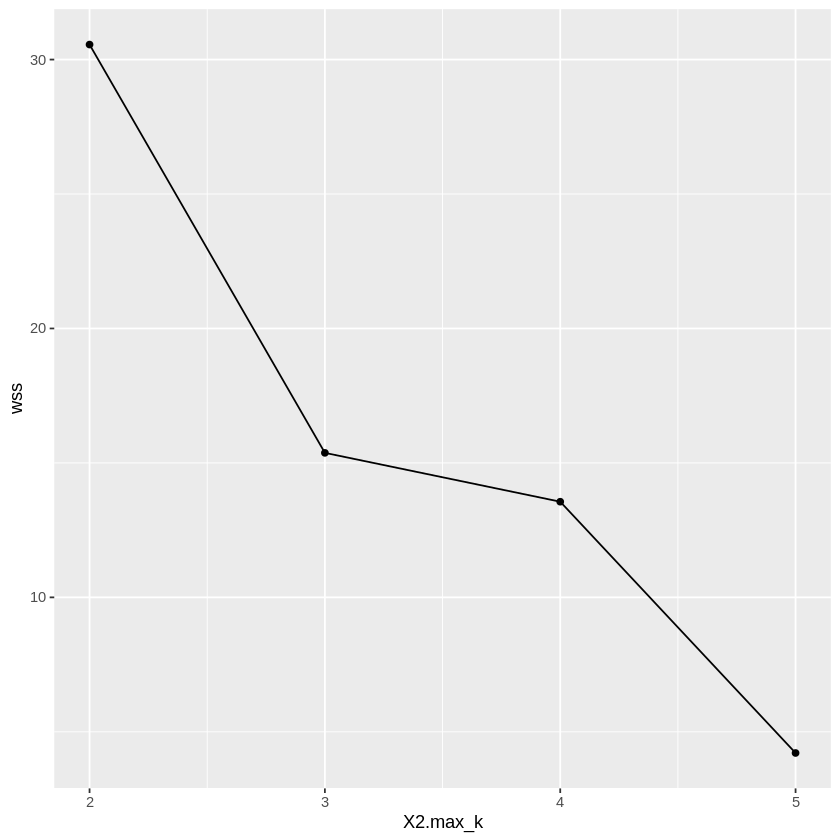

In [15]:
set.seed(42)

# функция запускает алгоритм k-mean и сохраняет сумму квадратов расстояния в кластерах
kmean_withinss <- function(dataset, k) {
    cluster <- kmeans(dataset, k)
    return (cluster$tot.withinss)
}

# Set maximum cluster 
max_k <- 5
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss, dataset = df_scaled)

# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

# Plot the graph with gglop
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = seq(1, max_k, by = 1))

In [16]:
optimal_k <- 3

# create clustering model
clust <- kmeans(df_scaled, optimal_k)

In [17]:
# информация о кластерах
# clust$cluster
clust$centers
clust$size

,age,weight,height,ufc_wins,ufc_loses,ufc_draws,ufc_no_contests,mma_wins,mma_loses,mma_draws,mma_no_contests
1,-1.1832406,0.9644856,1.0020060,-0.4889744,-0.4365631,-1.2909944,-0.4082483,-0.7417076,-0.4082483,-1.2909944,-0.4082483
2,0.3053524,-0.3616821,-0.2004012,-0.6723397,-0.6236615,0.6454972,0.8164966,-0.3423266,-0.6908817,0.6454972,0.8164966
3,0.8778882,-0.6028035,-0.8016048,1.1613141,1.0602246,0.6454972,-0.4082483,1.0840342,1.0991300,0.6454972,-0.4082483


[1] 2 2 2

In [18]:
# присвоим метки кластеров исходному набору данных
df$Cluster <- clust$cluster
df$Cluster.Label <- as.character(clust$cluster)

df_scaled$Cluster <- clust$cluster
df_scaled$Cluster.Label <- as.character(clust$cluster)

head(df)

,age,weight,height,ufc_wins,ufc_loses,ufc_draws,ufc_no_contests,mma_wins,mma_loses,mma_draws,mma_no_contests,Cluster,Cluster.Label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
93,29,185,75,8,5,0,1,21,8,0,1,1,1
260,28,185,75,1,2,0,1,10,2,0,1,1,1
284,38,170,72,29,16,1,1,36,16,1,1,3,3
300,37,170,71,3,3,1,2,19,4,1,2,2,2
412,33,145,71,2,2,1,1,19,3,1,1,2,2
471,37,135,66,16,7,1,1,27,10,1,1,3,3


In [19]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [21]:
# Построим тепловую карту
center <- clust$centers

# Create dataset with the cluster number
cluster <- c(1:nrow(center))
center_df <- data.frame(cluster, center)

# Reshape the data
center_reshape <- gather(center_df, features, values, age:mma_no_contests)
head(center_reshape)

,cluster,features,values
,<int>,<chr>,<dbl>
1,1,age,-1.1832406
2,2,age,0.3053524
3,3,age,0.8778882
4,1,weight,0.9644856
5,2,weight,-0.3616821
6,3,weight,-0.6028035


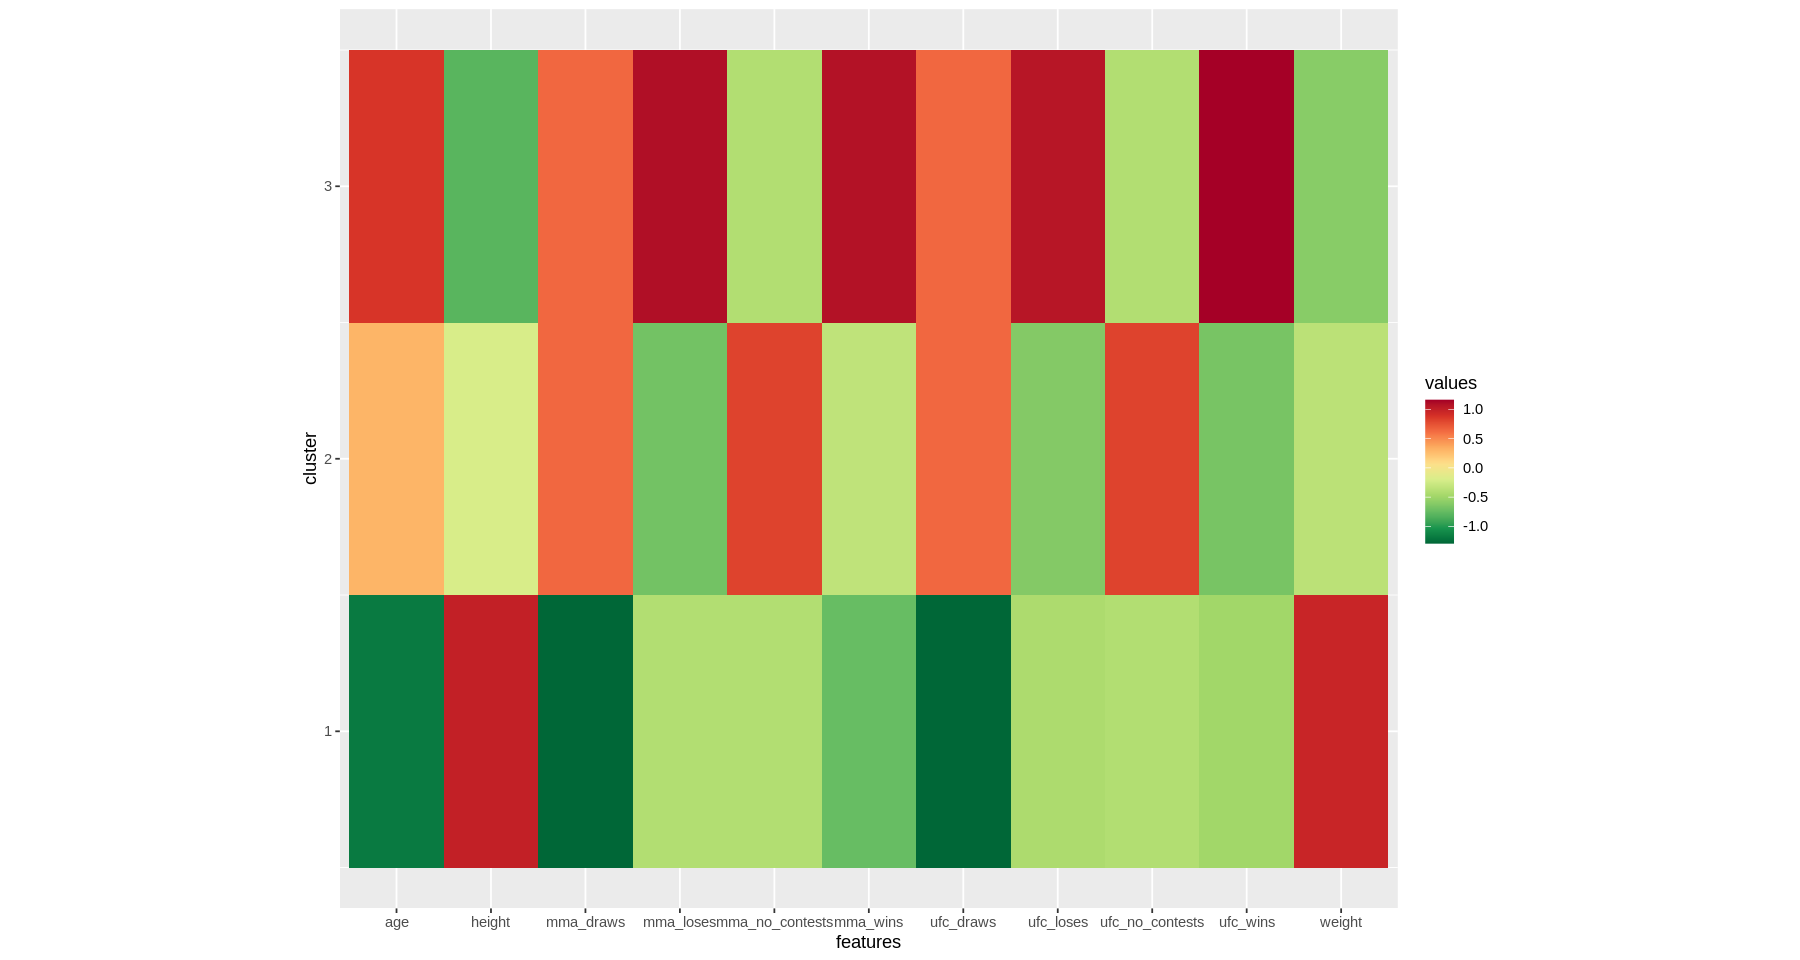

In [22]:
# Create the palette
hm.palette <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')), space='Lab')

# Plot the heat map
ggplot(data = center_reshape, aes(x = features, y = cluster, fill = values)) +
    scale_y_continuous(breaks = seq(1, 8, by = 1)) +
    geom_tile() +
    coord_equal() +
    scale_fill_gradientn(colours = hm.palette(50)) +
    theme(aspect.ratio = 0.85)

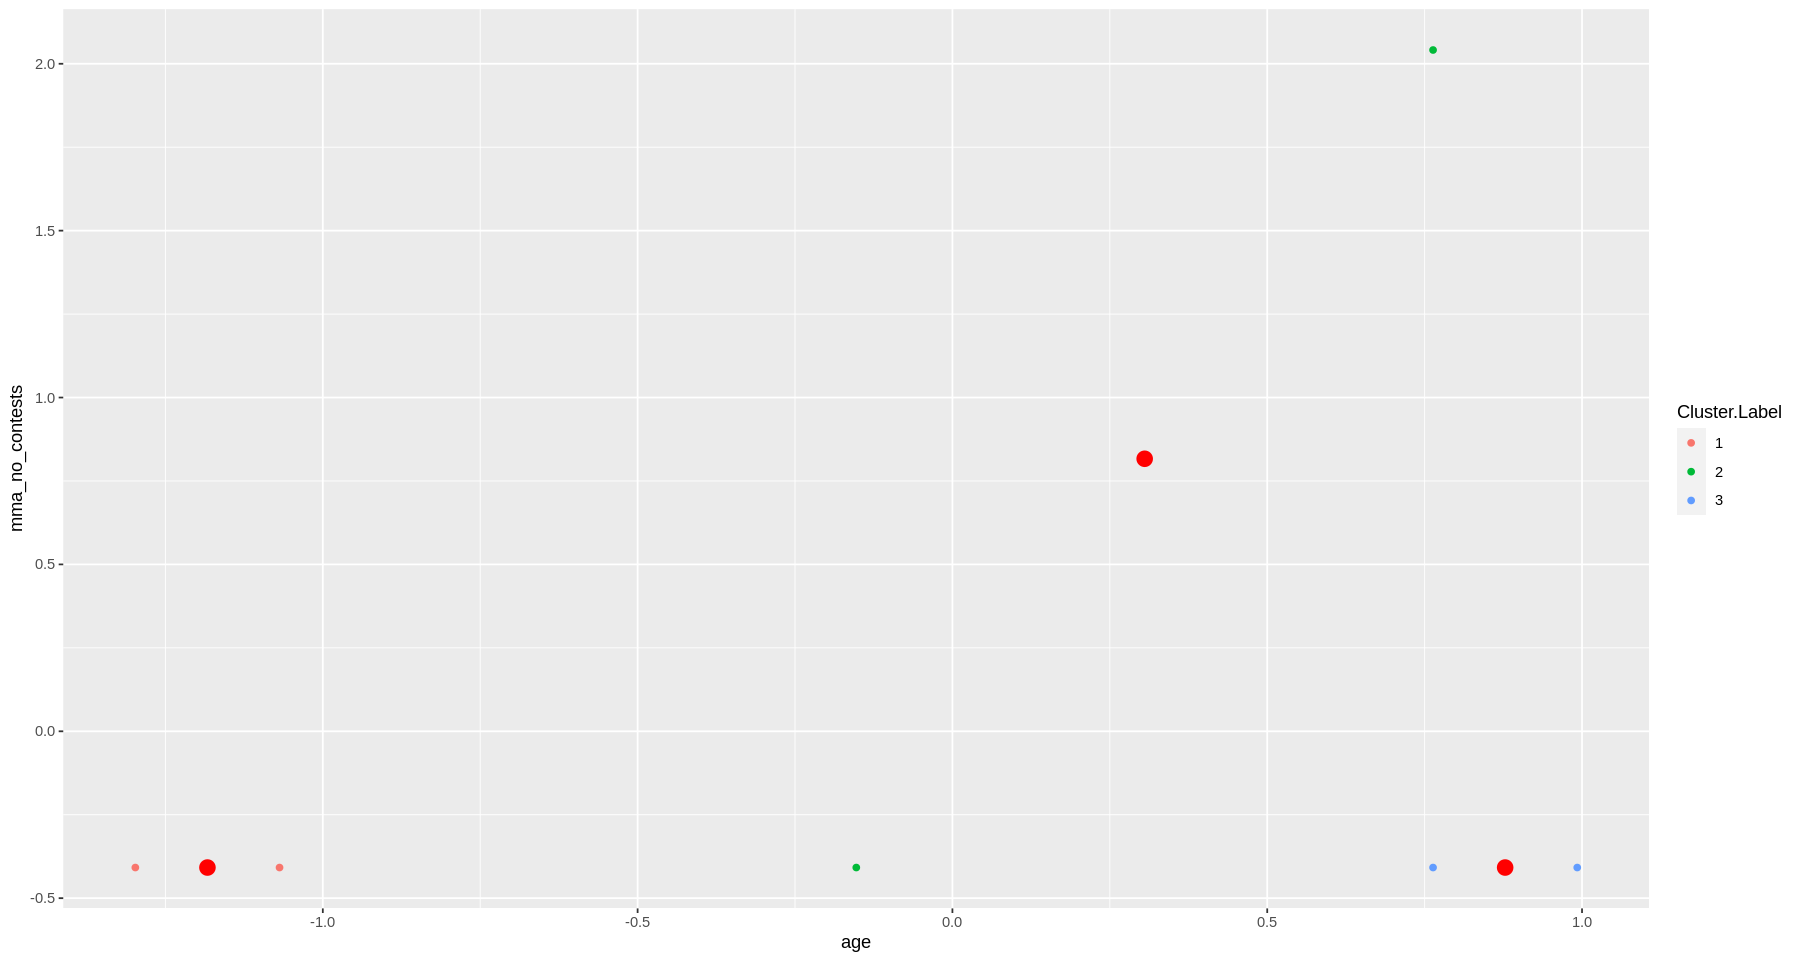

In [26]:
# визуализация данных в разрезе возраста и без результата с центрами кластеров
ggplot() +
  geom_point(data = df_scaled, mapping = aes(x = age, y = mma_no_contests, colour = Cluster.Label)) +
    geom_point(mapping = aes_string(x = clust$centers[, "age"], 
                                  y = clust$centers[, "mma_no_contests"]),
                                  color = "red", size = 4)

In [27]:
# libraries
install.packages("naivebayes")
install.packages("psych")

library(naivebayes)
library(dplyr)
library(ggplot2)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


naivebayes 0.9.7 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [28]:
# считываем датасет
getwd()
data <- read.csv("ufc_master_data.csv")

[1] "/content"

In [29]:
# содержимое данных
str(data)
summary(data) 

'data.frame':	617 obs. of  14 variables:
 $ ranking        : chr  "C" "1" "2" "3" ...
 $ name           : chr  "Brandon Moreno" "Deiveson Figueiredo" "Askar Askarov" "Alexandre Pantoja" ...
 $ age            : int  27 33 29 31 29 29 28 29 28 31 ...
 $ weight         : int  125 125 125 125 125 125 125 125 125 125 ...
 $ gender         : chr  "Male" "Male" "Male" "Male" ...
 $ height         : int  67 65 65 65 64 67 65 65 66 68 ...
 $ ufc_wins       : int  8 9 3 8 6 2 5 3 5 5 ...
 $ ufc_loses      : int  2 2 0 3 2 2 2 2 1 4 ...
 $ ufc_draws      : int  2 1 1 NA NA NA NA NA NA NA ...
 $ ufc_no_contests: int  NA NA NA NA NA NA NA NA NA NA ...
 $ mma_wins       : int  19 20 14 24 24 12 22 17 17 15 ...
 $ mma_loses      : int  5 2 0 5 6 6 9 3 2 6 ...
 $ mma_draws      : int  2 1 1 NA NA NA NA NA 1 NA ...
 $ mma_no_contests: int  NA NA NA NA NA NA 1 1 NA NA ...


   ranking              name                age            weight     
 Length:617         Length:617         Min.   :21.00   Min.   :115.0  
 Class :character   Class :character   1st Qu.:28.00   1st Qu.:135.0  
 Mode  :character   Mode  :character   Median :31.00   Median :145.0  
                                       Mean   :31.13   Mean   :159.7  
                                       3rd Qu.:34.00   3rd Qu.:170.0  
                                       Max.   :44.00   Max.   :265.0  
                                                                      
    gender              height         ufc_wins        ufc_loses     
 Length:617         Min.   :59.00   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.:67.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Mode  :character   Median :69.00   Median : 3.000   Median : 2.000  
                    Mean   :69.53   Mean   : 4.686   Mean   : 2.901  
                    3rd Qu.:72.00   3rd Qu.: 6.000   3rd Qu.: 4.000  
            

In [55]:
# поля weight и height категориальные переменные, приведем к фактору (строка-категория)
data$weight <- as.factor(data$weight)
data$ranking <- as.factor(data$ranking)

In [56]:
# разбиение выборки на обучающую и тестовую выборки в пропорции 80% к 20% соответственно
set.seed(42)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.8,.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [58]:
# модель Naive Bayes; weight как функция для всех остальных данных (.)
model <- naive_bayes(weight ~ ., data = train, usekernel = T)
model

Warning message:
“naive_bayes(): Feature ranking - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature name - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature age - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature gender - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature height - zero probabilities are present. Consider Laplace smoothing.”
Warning message:
“naive_bayes(): Feature ufc_wins - zero probabilities are present. Consider Laplace smoothing.”


ERROR: ignored